<a href="https://colab.research.google.com/github/ramimagnatera/ADA-informes/blob/main/Informe_3_MaximoSubArreglo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Descripción del problema

El algoritmo **MaxSubArray** es el método para encontrar el sub-arreglo de elementos contiguo que contenga la suma más grande entre sus números. Este problema tiene diferentes maneras de resolver, ya sea con "la fuerza bruta", que vendria a ser comparando y sumando todos los sub-arreglos posibles, para asi quedarnos con el mayor. Como también mediante la recursividad, forma en la cual se aplicara en este informe, y que consiste en dividir el problema en partes más pequeñas y que de esta forma sea más eficiente.

**Entrada**: Secuencia de n números $[a_1,a_2,...,a_n]$

**Salida**: Sub-arreglo $[a_i,..,a_j]$, tal que la suma de los elementos es mayor o igual a cualquier otro sub-arreglo, es decir, $\sum\limits_{k=i}^j a_k \geq \sum\limits_{k=i'}^{j'} a_k$ , para cualquier par $(i',j')$, con $i' \leq j'\leq n$. 

Un uso que podriamos darle a la búsqueda del subarreglo máximo, sería para comparar la subida y bajada del precio por dia de algun producto en el cual se quiera invertir, gracias a este algoritmo podemos obtener el conjunto de dias en los cuales se puede obtener el mayor beneficio.

# 2. Sub-arreglo Máximo


##2.1 Descripción del algoritmo

Como función principal, lo que hace este algoritmo es la busqueda de, dado un arreglo $A$, el sub-arreglo de elementos contiguos que presente la mayor suma de sus elementos. Al igual que el MergeSort, este algoritmo también se basa bajo la premisa de *divide y vencerás* para encontrar dicho sub-arreglo. 

Lo que realiza este algoritmo principalmente es:

1.   Divide el arreglo en dos sub-arreglos de $n/2$ elementos cada uno.

2.   Recursivamente, se calcula la suma de los sub-arreglos, en donde podemos encontrar 3 casos principales:

  * Sub-Arreglo derecho
  * Sub-Arreglo izquierdo
  * Sub-Arreglo "Central" (donde la mayor suma se encuentre entre el cruce sub-arreglos)

3.  Se comparan los tres resultados obtenidos en el paso anterior, y se retorna el mayor de ellos.

##2.2 Ejemplo

<a href="https://imgur.com/QzLwLHe"><img src="https://i.imgur.com/QzLwLHe.png" title="source: imgur.com" /></a>

In [145]:
def MaxSubArray(A, lo, hi, verbose = False):
  if (lo == hi): return A[lo],lo,hi #Caso base
  mid = (hi + lo)//2

  left,loL,hiL = MaxSubArray(A, lo, mid, verbose) # Suma maxima parte izquieda
  right,loR,hiR = MaxSubArray(A, mid+1, hi, verbose) # Suma maxima parte derecha

  SubMid,loM,hiM = MaxSubArrayMid(A, lo, mid, hi, verbose) # Suma maxima cruce entre ambas (central)

  maximo = max(left, right, SubMid) # Máximo entre los 3 valores anteriores

  if(maximo == left):
    return maximo,loL,hiL
  elif(maximo == right):
    return maximo,loR,hiR
  else:
    return maximo,loM,hiM

def MaxSubArrayMid(A, lo, mid, hi, verbose):

  # Suma parte izquierda
  leftSum = 0
  largestL = -1000
  loaux = A[mid-1]
  for i in range(mid,lo-1,-1): # Desde el medio al inicio
    leftSum = leftSum + A[i]
    if (leftSum > largestL):
      largestL = leftSum
      loaux = i

  # Suma parte derecha
  rightSum = 0
  largestR = -1000
  hiaux = A[mid]
  for i in range(mid+1,hi+1): # Desde el medio al final
    rightSum = rightSum + A[i]
    if (rightSum > largestR):
      largestR = rightSum
      hiaux = i

  return (largestL + largestR),loaux,hiaux

#Ejemplo:
A = [-3,1,-2,2,-1,2]
B,lo,hi = MaxSubArray(A, 0, len(A)-1, verbose = False)

print("\nEl arreglo de entrada:",A)
print("El sub-arreglo máximo:", A[lo:hi+1], "y tiene una suma de:",B)



El arreglo de entrada: [-3, 1, -2, 2, -1, 2]
El sub-arreglo máximo: [2, -1, 2] y tiene una suma de: 3


# 3. Tiempo de ejecución

### **Teorema (Tiempo de ejecución).**

El algoritmo **MaxSubArray** tiene un **tiempo de ejecución** de $O(nLog(n))$ tanto en el mejor, como en el peor de los casos.

## Prueba del teorema

Observando el código, podemos apreciar que tanto para el mejor, como para el peor de los casos, el algoritmo realiza la misma funcionalidad y cantidad de comparaciones. Esto debido a la recursividad que emplea, lo que estandariza la cantidad de números para comparar a lo más estable posible.

Este algoritmo es de la complejidad: $T(n) = 2T(n/2) + Θ(n)$

Esto podemos comprobarlo aplicando el Teorema Maestro, puesto que cumple con la forma de $T(n) \leq aT(n/b)+O(n^d)$.

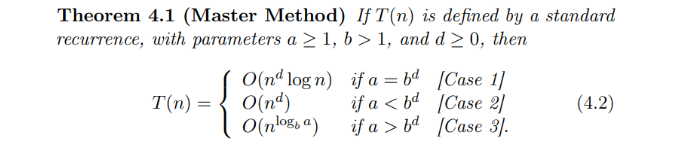

En nuestro caso: $a = 2, b = 2, d = 1$. Por lo que luego de aplicar la formula: $2 = 2^1$

Vemos que estamos en el caso de $O(n^1logn)$

Por lo tanto, con esto se comprueba que el tiempo de ejecución para el MaxSubArray es de $nLog(n)$.

# 4. Correctitud

### **Teorema Función MaxSubArray**

El algoritmo *MaxSubArray*, recibe una secuencia de número A = $[a_1,a_2,...,a_n]$ y retorna el sub-arreglo contiguo dentro del arreglo que contenga la suma más grande entre sus elementos.

###Prueba del Teorema

Caso base(n=1): Cuando el arreglo tiene un elemento, la mayor suma dentro de este mismo, valga la rebundancia, sería el valor del mismo elemento.

Caso general(n>1): Se asume que la función es correcta para problemas de tamaño de n>1. Debido a que, al dividir el problema en tres casos:

cuando se analiza la parte izquierda, central y derecha todas retornan el valor 

*   Analizar parte derecha: Se llama a la función pero ya no con todo el arreglo, si no, desde la mitad del arreglo hasta el final, lo cual nos retorna el subarreglo máximo de esta mitad.
*   Analizar parte izquierda: Se llama a la función desde el inicio del arreglo hasta la mitad de este, lo cual nos retorna el subarreglo máximo que se encuentra dentro de esta mitad.
*  Analizar parte central: Por último, tenemos el caso donde el subarreglo máximo pase por el centro de estos dos subarreglos creados, por lo que se llama a una función llamada *MaxSubArrayMid* la cual nos retorna la suma máxima de un subarreglo que obligatoriamente debe pasar entre los subarreglos derecho e izquierdo.

Luego de pasar por estos tres casos, la función encuentra el mayor entre ellos y asi obtiene el máximo subarreglo. Gracias a esto, podemos comprobar que tanto para la primera iteración, como para una i-ésima iteración, el teorema se cumple correctamente, retornando asi, el valor de mayor suma entre los sub-arreglos.

# 5. Experimentos

##  Tiempo de ejecución

En el siguiente gráfico se reporta el tiempo de ejecución del los algoritmos:

*  MaxSubArray
*  Kadane

en función del tamaño del problema para arreglos generados aleatoriamente de tamaños entre $5$ y $500$.

In [117]:
def kadane(a,size):
    max_so_far = a[0]
    max_ending_here = 0
      
    for i in range(0, size):
        max_ending_here = max_ending_here + a[i]
        if max_ending_here < 0:
            max_ending_here = 0
        elif (max_so_far < max_ending_here):
            max_so_far = max_ending_here
              
    return max_so_far

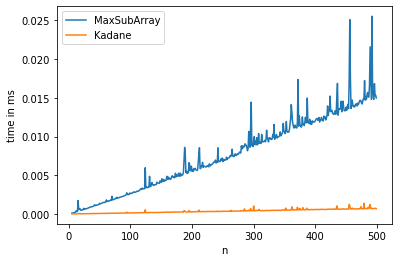

In [147]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random

x=[]; y=[]; y1=[]
verbose = False
for n in range(5,500):

  a = random.sample(range(-500, 500), n)

  t1 = repeat(setup="from __main__ import MaxSubArray", stmt=f"MaxSubArray({a},{0},{len(a)-1},{verbose})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import kadane", stmt=f"kadane({a},{len(a)})", repeat=1, number=10)

  x.append(n)
  y.append(t1)
  y1.append(t2)

plt.plot(x,y)
plt.plot(x,y1)
plt.legend(["MaxSubArray","Kadane"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

Luego de ver el gráfico, podemos comprobar el comportamiento logaritmico que presenta el MaxSubArray y la forma lineal que nos muestra el Kadane, como también, la eficiencia que presenta el algoritmo de Kadane, teniendo menos peaks y un tiempo muy bajo sin importar la cantidad de elementos que contenga.